#Niko Tsiolas
#Qiskit practice 2

# Do the hello world example on a 2-qubit Bell state


## Step 1: Map the problem to the circuits and operators 

In [9]:

import qiskit
import matplotlib as plt
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator 

import matplotlib.pyplot as plt


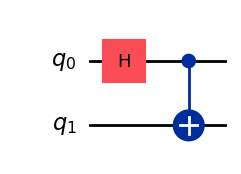

In [10]:
#this just creates a quantum circuit with 2 qubits and applies a Hadamard gate to the first qubit and a CNOT gate to the second qubit
qc = QuantumCircuit(2)

#applied the hadamard gate to the first qubit 
qc.h(0)

#apply the CNOT gate to the second qubit, which entangles the two qubits
qc.cx(0,1)

qc.draw(output='mpl')

In [11]:
#defining the Pauli operators
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

#adding them into a list
observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2 : Optimize


## Step 3:  Execute on the backend


In [12]:
#initialize the estimator
estimator = Estimator()

# this will run the the same quantum circuit for each observable. this does not involve the pauli ops, yet ensures that there is a QC instance for each observable
job = estimator.run([qc] * len(observables) ,observables)

result = job.result()

print(result)



EstimatorResult(values=array([ 1.        , -0.00976562, -0.00976562,  1.        , -0.02148438,
       -0.02148438]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.000451208, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.001825583, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 32768, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999046325683594, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.000451208, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits':

## Step 4: Post-Processing and Plotting

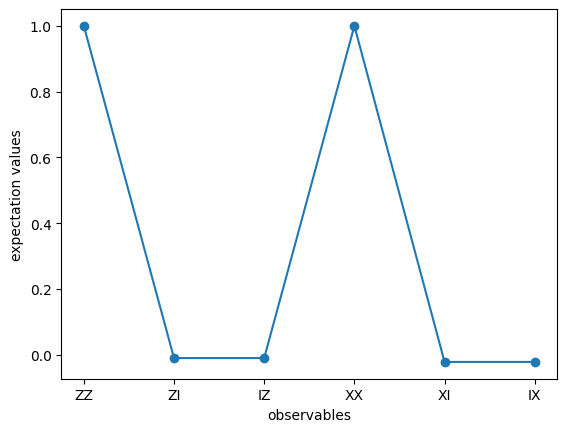

In [13]:
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']

values = job.result().values

plt.plot(data, values, '-o')

plt.xlabel("observables")
plt.ylabel("expectation values")

plt.show()

## extend the Hello World example to an n-qubit GHZ state


## Step 1: map the problem to circuits and operators 

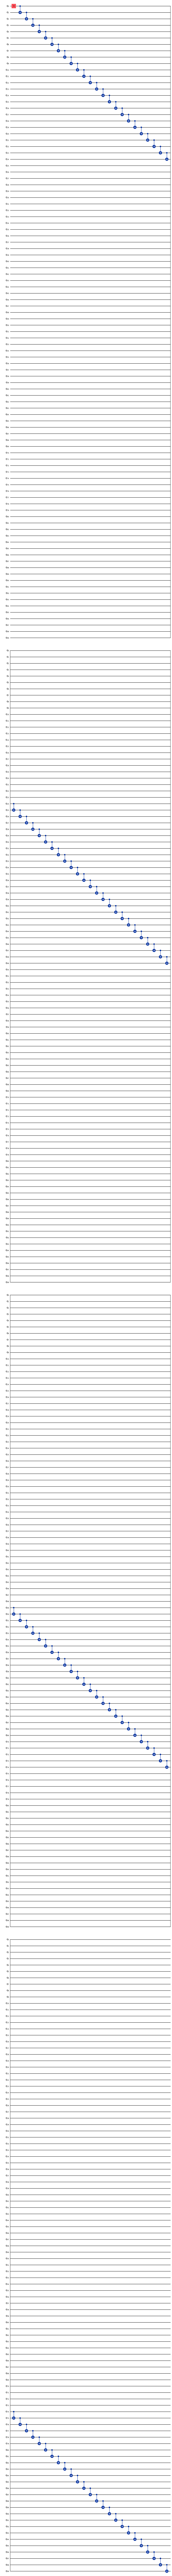

In [19]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')



In [20]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-1) for i in range(n-1)]

print(operator_strings)

print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIII

## Step 2: Optimize the problem for quantum executiion  